In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVR
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Google_Colab root
path='/content/drive/MyDrive/Hotle'
train=pd.read_csv(f"{path}/H1.csv")
test=pd.read_csv(f"{path}/H2.csv")

In [4]:
#Local_Root
# train=pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\5\Hw5\Hotle\Hotle\H1.csv')
# test=pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\5\Hw5\Hotle\Hotle\H2.csv')


# Preproccess Data

In [5]:
train.dropna(inplace=True)
test.dropna(inplace=True)
train.shape, test.shape

((39596, 28), (79302, 28))

In [6]:
# test.info()

In [7]:
trainLen = len(train)
x = pd.concat([train, test])
y = x['ADR']
x.drop('ADR', axis='columns', inplace=True);

In [8]:
catCols = ['ArrivalDateMonth', 'AssignedRoomType', 'ReservedRoomType',
               'CustomerType', 'DistributionChannel', 'ReservationStatus',
               'MarketSegment', 'Meal', 'DepositType', 'Country']

cMap = {}
for col in catCols:
  cMap[col] = {v: k for k, v in 
             dict(enumerate(train[col].astype('category').cat.categories)).items()}
  x[col] = x[col].astype('category').cat.codes

In [9]:
xTrain, xTest = x[:trainLen], x[trainLen:]
yTrain, yTest = y[:trainLen], y[trainLen:]

xTrain.shape, xTest.shape

((39596, 27), (79302, 27))

In [10]:
x_train=xTrain.to_numpy()
y_train=yTrain.to_numpy()
x_test=xTest.to_numpy()
y_test=yTest.to_numpy()

In [11]:
y_true=yTest.to_numpy()

In [12]:
# normalize the dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
# sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
y_test

array([  0.  ,  76.5 ,  68.  , ..., 157.71, 104.4 , 151.2 ])

In [14]:
scalar=MinMaxScaler()
y_train=scalar.fit_transform(y_train.reshape(-1, 1))
y_test=scalar.transform(y_test.reshape(-1, 1))

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [16]:
# x_test,x_train.shape

# Model

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [18]:
# #using Support vector regression

# pipe_svr = Pipeline([('scaler', StandardScaler()), ('SVM', svm.SVR(kernel = 'rbf'))]) 
# parameteres_svr = {'SVM__C':[0.1], 'SVM__gamma':[0.1]
#               ,'SVM__epsilon':[0.01]}
# model_SVR = GridSearchCV(pipe_svr, param_grid=parameteres_svr, cv=2)

# model_SVR.fit(x_train, y_train.ravel())

# print ('R squared metric for the model is:',model_SVR.score(x_test,y_test.ravel()))
# print ('best parameters of the model are:',model_SVR.best_params_)

In [ ]:
model_SVR=Pipeline([('scaler', StandardScaler()), ('SVM', svm.SVR(kernel = 'rbf', C = 10, epsilon= 0.01, gamma = 'auto' ) )])
model_SVR.fit(x_train, y_train.ravel())
print ('R squared metric for the model is:',model_SVR.score(x_test,y_test.ravel()))
# print ('best parameters of the model are:',model_SVR.best_params_)

In [21]:
y_pred2=model_SVR.predict(x_test)
y_pred3=scalar.inverse_transform(y_pred2.reshape(-1,1))
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_squared_error(y_true,y_pred3))

5292.582324877447


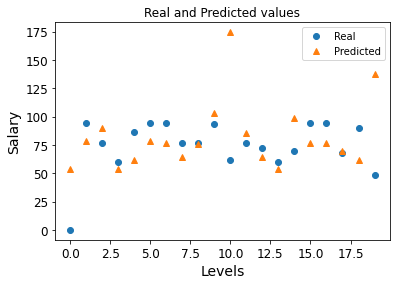

In [29]:
a=np.random.randint(1,500,20)   #generate 20 random test numbersto show
plt.figure()
plt.plot(y_true[a],'o',label='Real')
plt.plot(y_pred3[a],'^',label='Predicted')
plt.title('Real and Predicted values')
plt.ylabel('Salary')
plt.xlabel('Levels')
plt.legend()

In [41]:
y_true=y_true.reshape(-1,1)
delta=y_true-y_pred3
Y=np.concatenate((y_true,y_pred3,delta),axis=1)

In [42]:
Y.shape

(79302, 3)

In [46]:
import pandas
column_values = ['Real', 'Predicted', 'delta']
df_new=pd.DataFrame(data = Y,  
                  columns = column_values)
df_new.to_csv('FinalResult.csv')

In [51]:
# df_new.to_csv('/content/drive/dd/FinalResult.csv')
with open('/content/drive/dd/FinalResult.csv', 'w') as f:
  df_new.to_csv(f)

FileNotFoundError: ignored

In [44]:
df_new

,Real,Predicted,delta
0,0.00,63.167423,-63.167423
1,76.50,72.958949,3.541051
2,68.00,59.105333,8.894667
3,76.50,93.900016,-17.400016
4,76.50,69.409174,7.090826
...,...,...,...
79297,96.14,127.775730,-31.635730
79298,225.43,80.897635,144.532365
79299,157.71,37.242293,120.467707
79300,104.40,151.474885,-47.074885
